In [1]:
import numpy as np
from skimage.io import imread, imsave
from skimage.data import cells3d
from skimage.filters import gaussian
from scipy.ndimage import convolve
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle
from napari_simpleitk_image_processing import richardson_lucy_deconvolution
import matplotlib.pyplot as plt

In [14]:
from skimage import img_as_float
import imageio.v2 as iio
image = img_as_float(iio.imread("cells3d.tif"))[:,1,120:190,80:150]
# imshow(image)

(-0.5, 69.5, 69.5, -0.5)

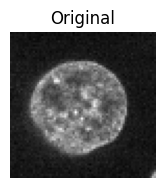

In [16]:
plt.subplot(1, 3, 1)
plt.imshow(image[30], cmap='gray')
plt.title('Original')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

(-0.5, 24.5, 24.5, -0.5)

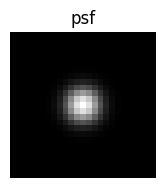

In [18]:
perfect_psf = np.zeros( (25,25,25) )
perfect_psf[12, 12,12] = 1
psf = gaussian(perfect_psf, sigma=2)

plt.subplot(1, 3, 1)
plt.imshow(psf[12], cmap='gray')
plt.title('psf')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

(-0.5, 69.5, 69.5, -0.5)

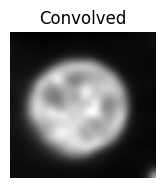

In [19]:
convolved = convolve(image, psf)

plt.subplot(1, 3, 1)
plt.imshow(convolved[30], cmap='gray')
plt.title('Convolved')
plt.axis('off') 

In [20]:
convolved.shape

(60, 70, 70)

(-0.5, 69.5, 69.5, -0.5)

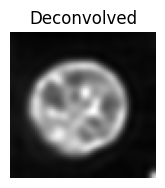

In [21]:
number_of_iterations = 30
deconvolved = richardson_lucy_deconvolution(convolved, psf, number_of_iterations)

plt.subplot(1, 3, 1)
plt.imshow(deconvolved[30], cmap='gray')
plt.title('Deconvolved')
plt.axis('off') 

In [22]:
%timeit -n 1 -r 10  richardson_lucy_deconvolution(convolved, psf, number_of_iterations)

5.65 s ± 19.5 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
